# Analysis of Ryanair Holdings (RYAAY) 2013 - 2017

##### An Analysis by Cathal McConnell, 14497212

This project looks at Ryanair's stock holdings over the last five full years. 
Ryanair is an Irish low-cost airline founded in 1984. It is the largest European airline by scheduled passengers flown, and it carries more international passengers than any other airline. Ryanair operates more than 400 Boeing 737-800 aircrafts. It is mainly characterised by its rapid expansion, a lot of which is down to CEO Michael O'Leary, and it now has a turnover of around 5 billion. 

I aim to explore this data a number of ways, and venture down as many avenues as I can, such as:
    - Overall trends
    - Yearly trends
    - Moving Averages
    - Percentage Differences
    - Single day trading
    - Significant falls
    - Significant rises

In [1]:
import os.path
import datetime
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Downloading and Parsing

Using the pandas command: read_html, the stock prices for Ryanair was read into 5 separate dataframes, one for each year as seen below. I found this the most efficient way to both read and parse the html. 

In [436]:
R13 = pd.read_html("http://mlg.ucd.ie/modules/COMP30760/stocks/ryaay.html")[0]
R14 = pd.read_html("http://mlg.ucd.ie/modules/COMP30760/stocks/ryaay.html")[1]
R15 = pd.read_html("http://mlg.ucd.ie/modules/COMP30760/stocks/ryaay.html")[2]
R16 = pd.read_html("http://mlg.ucd.ie/modules/COMP30760/stocks/ryaay.html")[3]
R17 = pd.read_html("http://mlg.ucd.ie/modules/COMP30760/stocks/ryaay.html")[4]

In [3]:
test = pd.read_html("https://utmbmontblanc.com/en/page/349/results.html")

ValueError: No tables found

Looking at the head of the 2017 dataframe to see everything has been read correctly. 

In [437]:
R17.head()

,Day,Month,Year,Open,High,Low,Close
0,3,1,2017,81.690002,82.089996,79.480003,79.669998
1,4,1,2017,81.779999,83.099998,81.330002,82.959999
2,5,1,2017,83.349998,84.430000,83.349998,83.860001
3,6,1,2017,83.150002,83.519997,82.449997,82.750000
4,9,1,2017,82.389999,83.839996,82.309998,83.279999


The dataframes are stored as a list called 'frames' and then joined using .concat. df is the name of my complete dataset that contains all years. 

In [438]:
frames = [R13, R14, R15, R16, R17]
df = pd.concat(frames)

In [439]:
df.head()

,Day,Month,Year,Open,High,Low,Close
0,2,1,2013,35.897434,36.082050,35.292309,35.507690
1,3,1,2013,35.897434,36.635899,35.784615,36.512821
2,4,1,2013,36.512821,36.758976,36.348717,36.687180
3,7,1,2013,37.589745,37.784615,37.353848,37.774361
4,8,1,2013,38.266666,38.758976,38.194870,38.492310


In [440]:
df.tail()

,Day,Month,Year,Open,High,Low,Close
246,22,12,2017,106.010002,106.580002,104.139999,104.309998
247,26,12,2017,104.820000,104.820000,102.910004,103.250000
248,27,12,2017,103.330002,104.029999,102.620003,103.339996
249,28,12,2017,105.089996,105.089996,103.440002,104.669998
250,29,12,2017,104.790001,105.080002,104.150002,104.190002


# Data Preparation

The dataset is already complete. There are no null values in any of the columns. Therefore no rows need to be deleted and all the data is full. This will make it easier to analyse and all results will be accurate

In [441]:
df.isnull().sum()

Day      0
Month    0
Year     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 250
Data columns (total 7 columns):
Day      1259 non-null int64
Month    1259 non-null int64
Year     1259 non-null int64
Open     1259 non-null float64
High     1259 non-null float64
Low      1259 non-null float64
Close    1259 non-null float64
dtypes: float64(4), int64(3)
memory usage: 78.7 KB


For preparing this dataframe it will be important to be able to use the dates and put it into a data series. Therefore I will create a 'Date' column with the existing columns. 

In [443]:
df['Date'] = pd.to_datetime((df.Year*10000+df.Month*100+df.Day).apply(str),format='%Y%m%d')

In [444]:
df.head()

,Day,Month,Year,Open,High,Low,Close,Date
0,2,1,2013,35.897434,36.082050,35.292309,35.507690,2013-01-02
1,3,1,2013,35.897434,36.635899,35.784615,36.512821,2013-01-03
2,4,1,2013,36.512821,36.758976,36.348717,36.687180,2013-01-04
3,7,1,2013,37.589745,37.784615,37.353848,37.774361,2013-01-07
4,8,1,2013,38.266666,38.758976,38.194870,38.492310,2013-01-08


The new date column will now become the index of the dataframe, making it easier to work with as a time series. 

In [445]:
df = df.set_index('Date')

In [446]:
df.head()

,Day,Month,Year,Open,High,Low,Close
Date,,,,,,,
2013-01-02,2,1,2013,35.897434,36.082050,35.292309,35.507690
2013-01-03,3,1,2013,35.897434,36.635899,35.784615,36.512821
2013-01-04,4,1,2013,36.512821,36.758976,36.348717,36.687180
2013-01-07,7,1,2013,37.589745,37.784615,37.353848,37.774361
2013-01-08,8,1,2013,38.266666,38.758976,38.194870,38.492310


An example of the time series, obviously the Day, Month and Year columns are included but can be ignored. 

<function matplotlib.pyplot.show>

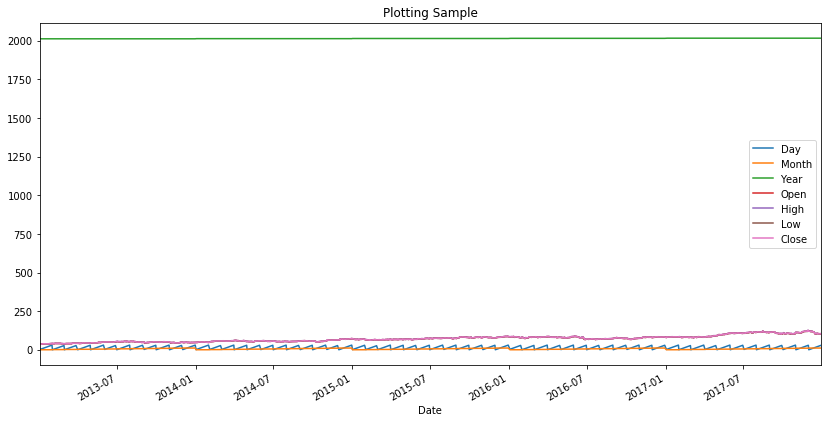

In [447]:
df.plot(figsize=(14,7))
plt.title('Plotting Sample')
plt.show

I want to get an idea of the trend of the prices. Therfore I drop the day, month and year columns just for this graph. As you can see from the graph there is a gradual increase in the price. Obviously there are a few dips along the way and I will examine these in more detail. 

In [448]:
dfstock = df.drop(df.columns[[0, 1, 2]], axis=1)

In [449]:
dfstock.head()

,Open,High,Low,Close
Date,,,,
2013-01-02,35.897434,36.082050,35.292309,35.507690
2013-01-03,35.897434,36.635899,35.784615,36.512821
2013-01-04,36.512821,36.758976,36.348717,36.687180
2013-01-07,37.589745,37.784615,37.353848,37.774361
2013-01-08,38.266666,38.758976,38.194870,38.492310


<function matplotlib.pyplot.show>

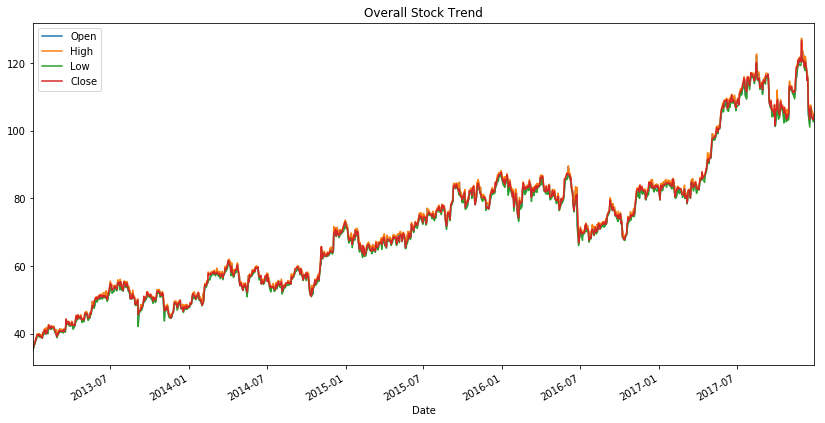

In [450]:
dfstock.plot(figsize = (14, 7))
plt.title('Overall Stock Trend')
plt.show

The dataframe is described in more detail. We can see the average and standard deviations, etc of the data. 

In [451]:
dfstock.describe()

,Open,High,Low,Close
count,1259.000000,1259.000000,1259.000000,1259.000000
mean,71.775439,72.409397,71.142101,71.781942
std,20.183919,20.327456,20.065047,20.218855
min,35.897434,36.082050,35.292309,35.507690
25%,54.682053,55.199999,54.158974,54.728206
50%,70.758972,71.470001,70.120003,70.589996
75%,82.744487,83.515000,82.119999,82.970001
max,125.500000,127.349998,121.650002,126.690002


# Data Analysis

We will now begin to analyse the data. This graph highlights the gradual increase. The average of the Open and Close seem to be near to equal for each year, while obviously the Highest price is always larger than the Lowest price for the given year. It gives the average of each column and shows it yearly. The largest average increase is from 2016 to 2017 where the price has an average of just above 100. 

In [452]:
avYearly = df.drop(df.columns[[0, 1]], axis=1)
avYearly1 = df.drop(df.columns[[0, 1, 2]], axis=1)

Text(0.5,1,'Year by Year Averages')

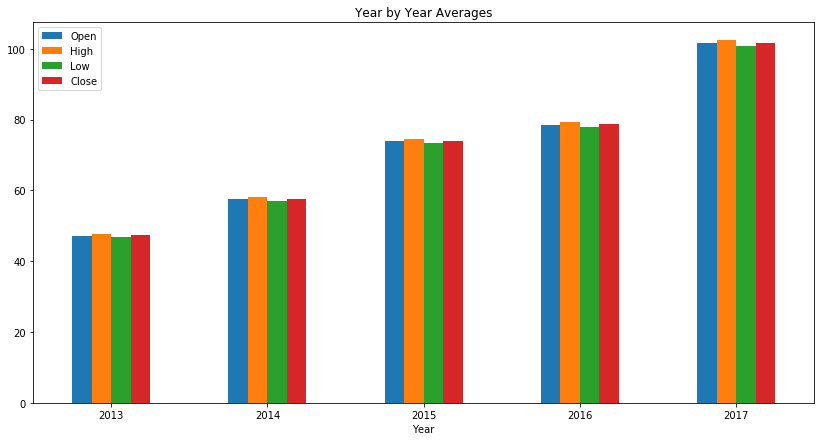

In [453]:
avYear = avYearly.groupby('Year')
avYear.mean().plot(kind='bar', figsize = (14, 7), rot=0)
plt.title('Year by Year Averages')

The graph below shows the day by day trend of Ryanair's stock price. A gradual increase can be seen year on year. There seems to have been quite a few significant falls over the years, and we will look at them in more detail later. Overall through the rises outnumber the falls. The price has peaked at around 120, while the lowest price was the first price in the data. 

<function matplotlib.pyplot.show>

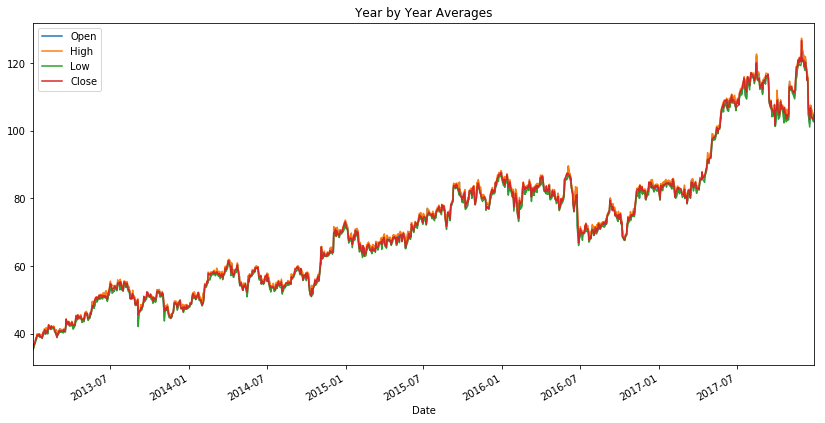

In [454]:
avYearly1.plot(figsize = (14, 7))
plt.title('Year by Year Averages')
plt.show

The Closing Price is the price of stock as each trading day comes to an end. Looking at this gives us a clear sense of how the stock is doing. 

In [455]:
dfClose = df["Close"]

<function matplotlib.pyplot.show>

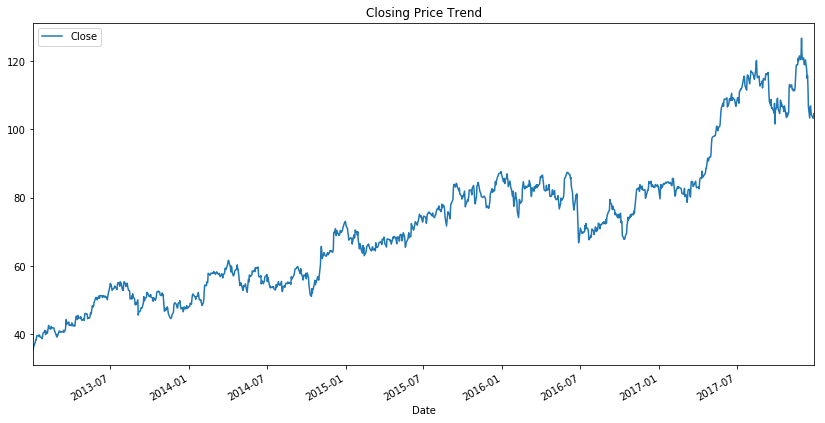

In [456]:
dfClose.plot(figsize = (14, 7), legend=True)
plt.title('Closing Price Trend')
plt.show

## Moving Averages

Moving averages are the averages of the last x number of days. They are a common practice in stock market analysis. They smooth out the series and this helps them easier to identify trends. Below, the moving averages by year, quarter, month and week are show...

In [457]:
dfRollY = np.round(dfClose.rolling(window = 365, center = False).mean(), 2)
dfRollQ = np.round(dfClose.rolling(window = 120, center = False).mean(), 2)
dfRollM = np.round(dfClose.rolling(window = 30, center = False).mean(), 2)
dfRollW = np.round(dfClose.rolling(window = 7, center = False).mean(), 2)

The graph shows the Moving Averages. The blue line is the smoothest line. This is the yearly average. It highlights the gradual increase Ryanair has experienced stock wise. The orange shows the quarterly average. This line is more fluctuated. The second half of 2016 shows a major dip that can't be seen in the yearly average. The monthly and weekly average are fairly consistent with eachother. 

<function matplotlib.pyplot.show>

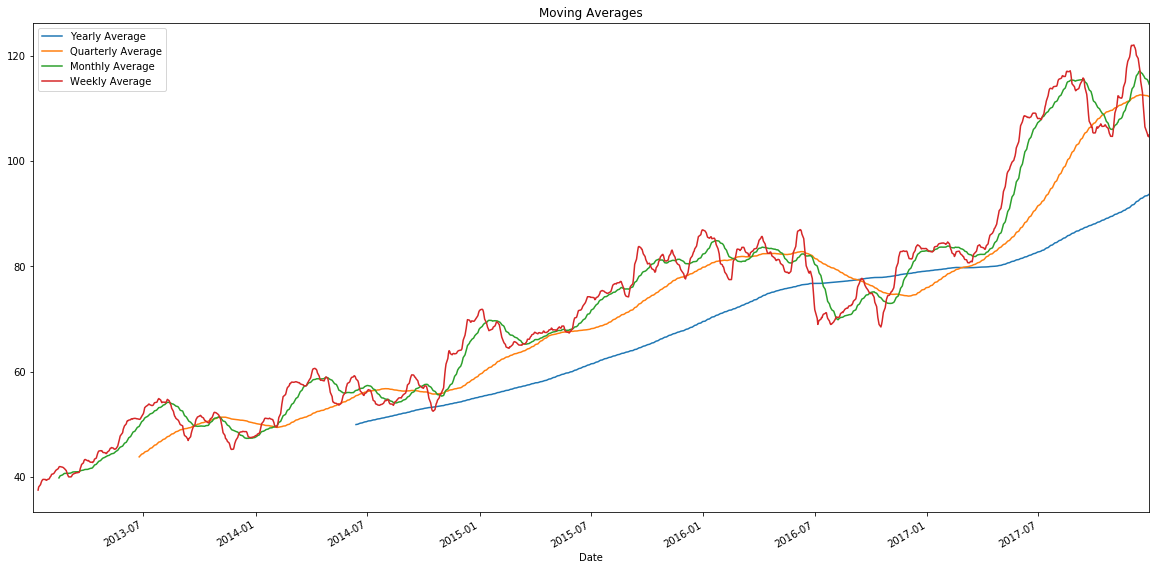

In [458]:
plt.subplot()
dfRollY.plot(figsize = (20, 10))
plt.show

dfRollQ.plot()
plt.show

dfRollM.plot()
plt.show

dfRollW.plot()
plt.show
plt.title('Moving Averages')
plt.legend(["Yearly Average", "Quarterly Average", "Monthly Average", "Weekly Average"])
plt.show

This graph compares the quarterly average with the actual daily price. As you can see the QA line would suggest the trend is quite smooth, and accounting for the major dip in 2016 the rest of the line is quite smooth. This is in stark contrast to the actual daily price. This line sees many spikes and falls over this time. The same shape is mainly followed until 2017 where a large gap appears. 

<function matplotlib.pyplot.show>

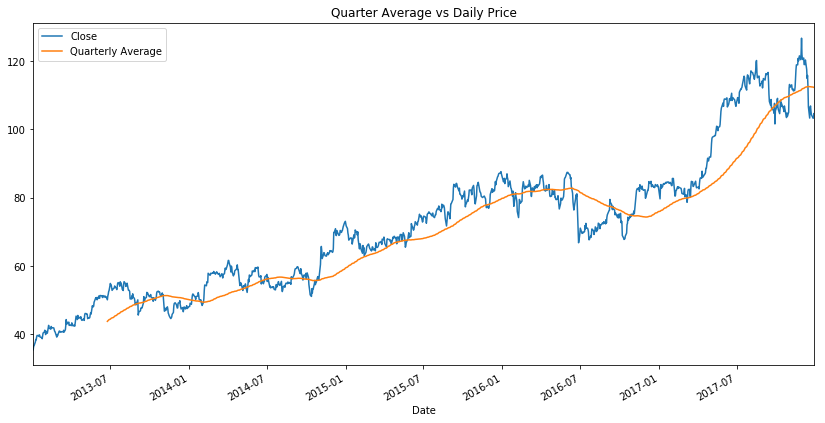

In [459]:
plt.subplot()
dfClose.plot(figsize = (14, 7), legend=True)
plt.show

dfRollQ.plot()
plt.title('Quarter Average vs Daily Price')
plt.legend(["Close", "Quarterly Average"])
plt.show

## 2017

The yearly prices will now be examines. 2017 is filtered from the dataframe...

In [460]:
df2017 = df[df['Year'] == 2017].copy()

In [461]:
df2017.head()

,Day,Month,Year,Open,High,Low,Close
Date,,,,,,,
2017-01-03,3,1,2017,81.690002,82.089996,79.480003,79.669998
2017-01-04,4,1,2017,81.779999,83.099998,81.330002,82.959999
2017-01-05,5,1,2017,83.349998,84.430000,83.349998,83.860001
2017-01-06,6,1,2017,83.150002,83.519997,82.449997,82.750000
2017-01-09,9,1,2017,82.389999,83.839996,82.309998,83.279999


The unwanted columns are dropped....

In [462]:
df17graph = df2017.drop(df2017.columns[[0, 1, 2]], axis=1)

In [463]:
df17graph.head()

,Open,High,Low,Close
Date,,,,
2017-01-03,81.690002,82.089996,79.480003,79.669998
2017-01-04,81.779999,83.099998,81.330002,82.959999
2017-01-05,83.349998,84.430000,83.349998,83.860001
2017-01-06,83.150002,83.519997,82.449997,82.750000
2017-01-09,82.389999,83.839996,82.309998,83.279999


We see 2017 in greater detail. This graph is very intresting. We see the year starts off slow in terms of growth, but in April there is a large increase which continues into May, June and July. August is where the first significant decrease comes and indeed this pattern continues until the end of October. The peak is actually hit at the start of December, but then it plummets until the end of the year. The reasons for this trend will be examined further later on. 

<function matplotlib.pyplot.show>

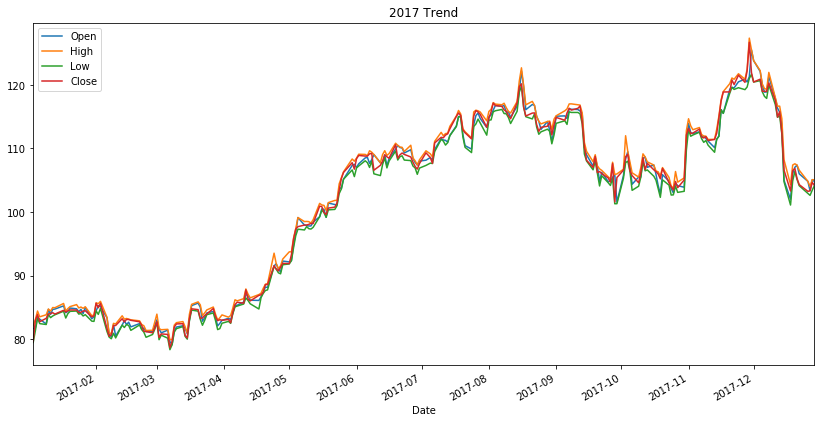

In [464]:
df17graph.plot(figsize = (14, 7))
plt.title('2017 Trend')
plt.show

We want to see how varied a price can be from open to close. It gives us a sense of how much trading goes on in a single day. 

In [465]:
df2017['OCGap'] = df2017['Close'] - df2017['Open']

In [466]:
OCGap17 = df2017['OCGap']

The range can be up to 4 of a difference usually, with more than 4 seen in September and December on opposite sides of the zero. 

<function matplotlib.pyplot.show>

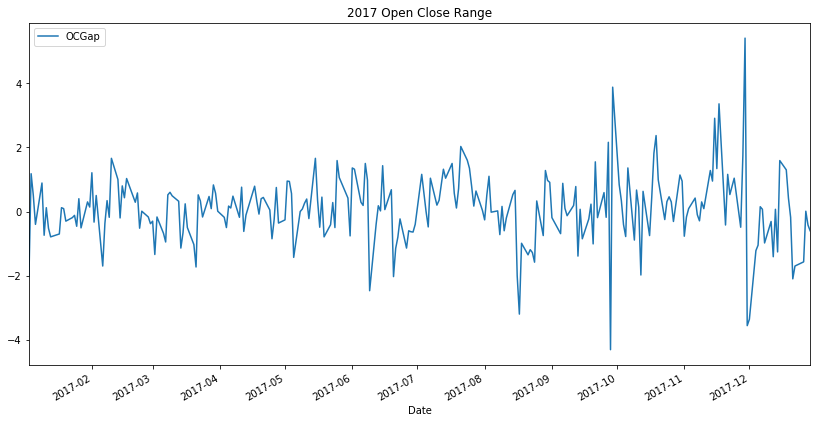

In [467]:
OCGap17.plot(figsize = (14, 7), legend=True)
plt.title('2017 Open Close Range')
plt.show

I also wanted to see the difference between the highest point and the lowest point for a given day. The gap is as big as 6, probably on that same day in December. 

<function matplotlib.pyplot.show>

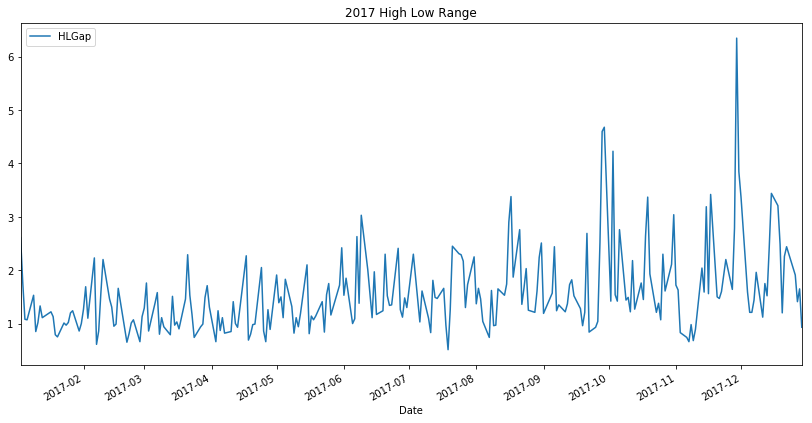

In [468]:
df2017['HLGap'] = df2017['High'] - df2017['Low']
HLGap = df2017['HLGap']
HLGap.plot(figsize = (14, 7), legend=True)
plt.title('2017 High Low Range')
plt.show

We then looked at the percentage falls and rises in relation to the closing price, day after day. Percentages give us an even better insight into how much Ryanair grows or falls on a daily basis. pct_change() is used and this looks at the previous record and gets the percentage difference. 

In [469]:
df2017['PercentageDiff'] = df2017['Close'].pct_change()

In [470]:
df2017.head()

,Day,Month,Year,Open,High,Low,Close,OCGap,HLGap,PercentageDiff
Date,,,,,,,,,,
2017-01-03,3,1,2017,81.690002,82.089996,79.480003,79.669998,-2.020004,2.609993,NaN
2017-01-04,4,1,2017,81.779999,83.099998,81.330002,82.959999,1.180000,1.769996,0.041295
2017-01-05,5,1,2017,83.349998,84.430000,83.349998,83.860001,0.510003,1.080002,0.010849
2017-01-06,6,1,2017,83.150002,83.519997,82.449997,82.750000,-0.400002,1.070000,-0.013236
2017-01-09,9,1,2017,82.389999,83.839996,82.309998,83.279999,0.890000,1.529998,0.006405


In [471]:
perc2017 = df2017['PercentageDiff']

As you can see the percentage difference has never been above 1 percent, with the norm at around 0.2%. 

<function matplotlib.pyplot.show>

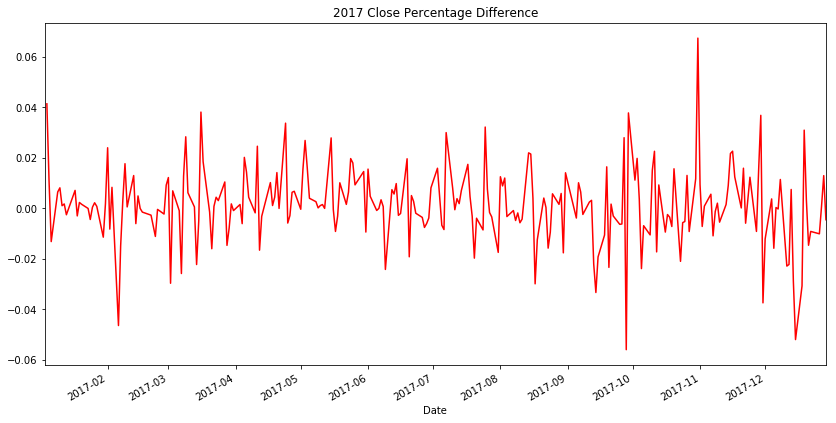

In [472]:
perc2017.plot(figsize = (14, 7), color = 'red')
plt.title('2017 Close Percentage Difference')
plt.show

## 2016

We then repeated this analysis with the other years. 2016 seen one of the biggest falls for Ryanair in recent times. 

In [473]:
df2016 = df[df['Year'] == 2016].copy()

In [474]:
df2016.head()

,Day,Month,Year,Open,High,Low,Close
Date,,,,,,,
2016-01-04,4,1,2016,84.500000,84.809998,83.709999,84.639999
2016-01-05,5,1,2016,84.430000,85.690002,83.839996,85.489998
2016-01-06,6,1,2016,84.760002,86.410004,84.639999,85.669998
2016-01-07,7,1,2016,84.620003,84.870003,83.300003,84.129997
2016-01-08,8,1,2016,85.800003,86.480003,85.180000,85.290001


In [475]:
df16graph = df2016.drop(df2016.columns[[0, 1, 2]], axis=1)

In [476]:
df16graph.head()

,Open,High,Low,Close
Date,,,,
2016-01-04,84.500000,84.809998,83.709999,84.639999
2016-01-05,84.430000,85.690002,83.839996,85.489998
2016-01-06,84.760002,86.410004,84.639999,85.669998
2016-01-07,84.620003,84.870003,83.300003,84.129997
2016-01-08,85.800003,86.480003,85.180000,85.290001


2016 is the only year where the price at the start of the year is larger than the price at the enf of the year in this dataset. There was numerous falls throughout the year, in February/March, September/October and the major one in June. It is the worst year for Ryanair compared to the others. 

<function matplotlib.pyplot.show>

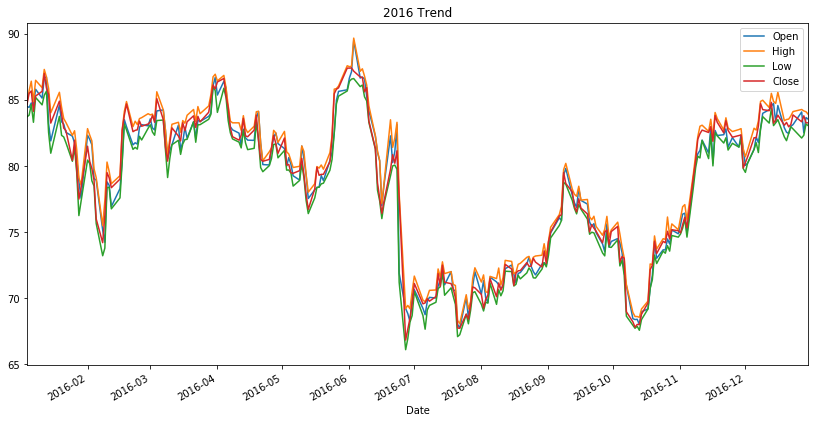

In [477]:
df16graph.plot(figsize = (14, 7))
plt.title('2016 Trend')
plt.show

The Open to Close range is examined, with the major spike in the middle of June highlighting the significant crash on that single day. 

<function matplotlib.pyplot.show>

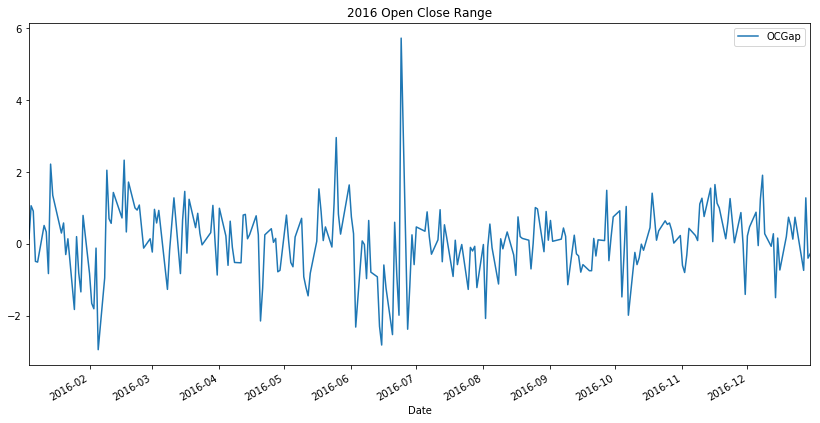

In [478]:
df2016['OCGap'] = df2016['Close'] - df2016['Open']
OCGap = df2016['OCGap']
OCGap.plot(figsize = (14, 7), legend=True)
plt.title('2016 Open Close Range')
plt.show

This spike is again seen in the High to Low comparison. It is at nearly 7 here, showing how much variation occured. 

<function matplotlib.pyplot.show>

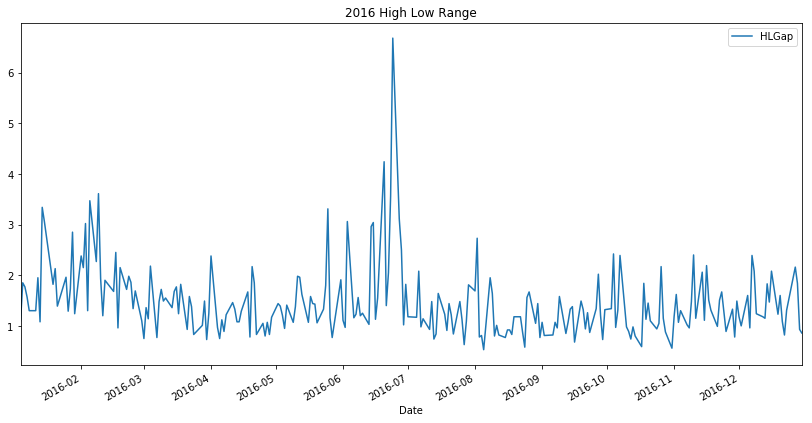

In [479]:
df2016['HLGap'] = df2016['High'] - df2016['Low']
HLGap = df2016['HLGap']
HLGap.plot(figsize = (14, 7), legend=True)
plt.title('2016 High Low Range')
plt.show

It is perhaps the biggest percentage difference in the entire dataset, with it being above 1 per cent of a change. This is massive in terms of stock. 

<function matplotlib.pyplot.show>

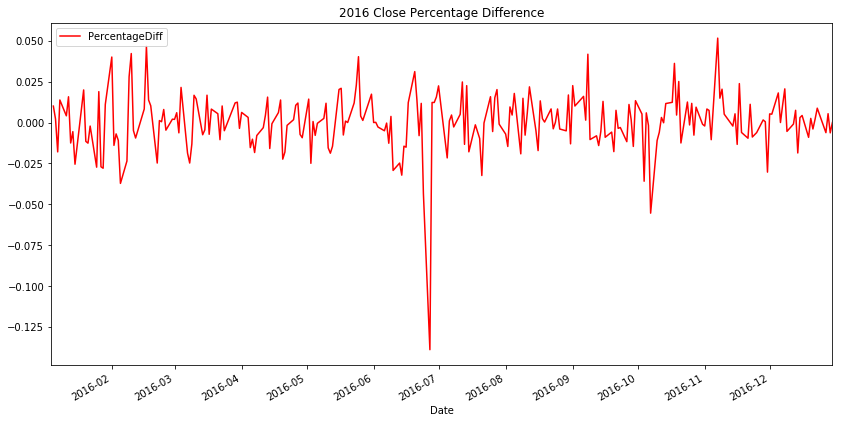

In [480]:
df2016['PercentageDiff'] = df2016['Close'].pct_change()
perc2016 = df2016['PercentageDiff']
perc2016.plot(figsize = (14, 7), color = 'red', legend = True)
plt.title('2016 Close Percentage Difference')
plt.show

## 2015

2015 is now looked at...

In [481]:
df2015 = df[df['Year'] == 2015].copy()
df2015.head()

,Day,Month,Year,Open,High,Low,Close
Date,,,,,,,
2015-01-02,2,1,2015,72.615387,72.738464,71.066666,71.733330
2015-01-05,5,1,2015,71.569229,71.784615,70.882050,70.974358
2015-01-06,6,1,2015,70.061539,70.061539,68.512817,69.671791
2015-01-07,7,1,2015,69.220512,69.302567,67.856407,69.025642
2015-01-08,8,1,2015,67.343590,67.641029,66.800003,67.599998


In [482]:
df15graph = df2015.drop(df2015.columns[[0, 1, 2]], axis=1)
df15graph.head()

,Open,High,Low,Close
Date,,,,
2015-01-02,72.615387,72.738464,71.066666,71.733330
2015-01-05,71.569229,71.784615,70.882050,70.974358
2015-01-06,70.061539,70.061539,68.512817,69.671791
2015-01-07,69.220512,69.302567,67.856407,69.025642
2015-01-08,67.343590,67.641029,66.800003,67.599998


This is a very good year for Ryanair. February to August sees a steady rise with spikes also occurring in September and December. It contributed to massive growth for the company. 

<function matplotlib.pyplot.show>

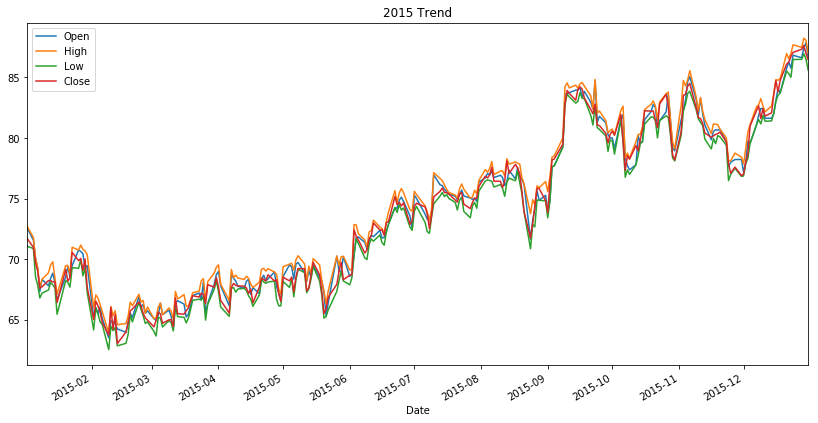

In [483]:
df15graph.plot(figsize = (14, 7))
plt.title('2015 Trend')
plt.show

The Open Close range was actually very varied, showing how much trading was going on at this time. 

<function matplotlib.pyplot.show>

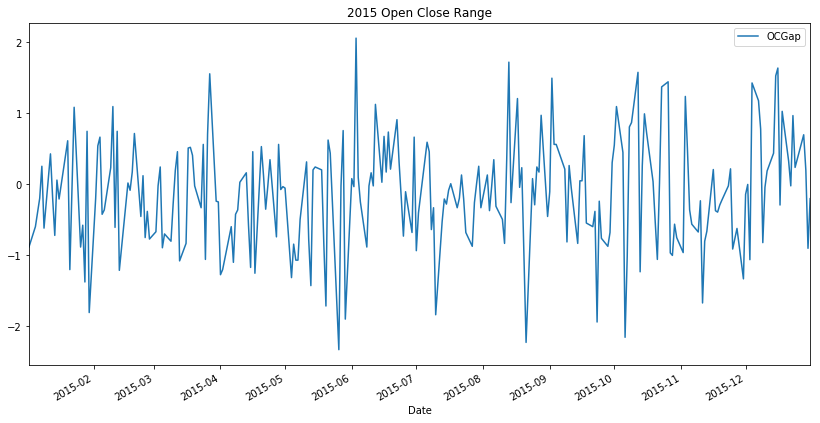

In [484]:
df2015['OCGap'] = df2015['Close'] - df2015['Open']
OCGap = df2015['OCGap']
OCGap.plot(figsize = (14, 7), legend=True)
plt.title('2015 Open Close Range')
plt.show

On numerous occasions the high low range was nearly 3, again showing the amount of buying and selling of stock happening

<function matplotlib.pyplot.show>

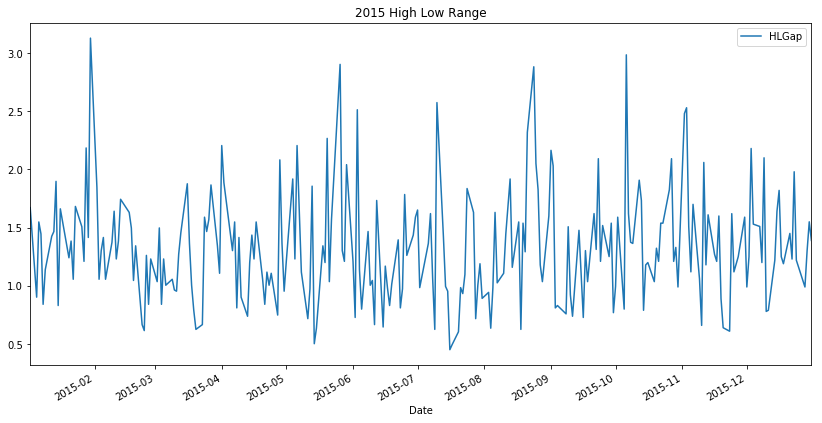

In [485]:
df2015['HLGap'] = df2015['High'] - df2015['Low']
HLGap = df2015['HLGap']
HLGap.plot(figsize = (14, 7), legend=True)
plt.title('2015 High Low Range')
plt.show

The percentage difference of the closing price does not vary too much. Less that 0.04 is relatively small each side. 

<function matplotlib.pyplot.show>

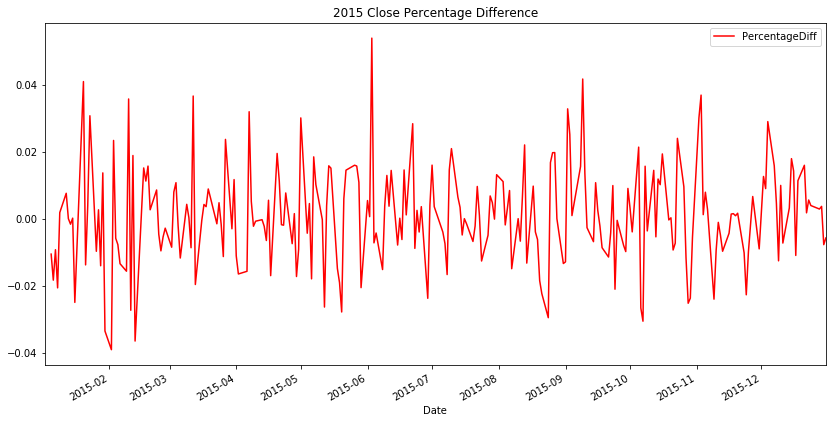

In [486]:
df2015['PercentageDiff'] = df2015['Close'].pct_change()
perc2015 = df2015['PercentageDiff']
perc2015.plot(figsize = (14, 7), legend = True, color = 'red')
plt.title('2015 Close Percentage Difference')
plt.show

## 2014

2014 saw a sharp and sudden rise at the end of the year. Before that it was fairly consistent in terms of fluctuations. 

In [487]:
df2014 = df[df['Year'] == 2014].copy()
df2014.head()

,Day,Month,Year,Open,High,Low,Close
Date,,,,,,,
2014-01-02,2,1,2014,48.092308,48.471794,47.907692,48.194870
2014-01-03,3,1,2014,48.553844,49.200001,48.553844,49.138462
2014-01-06,6,1,2014,48.902565,49.323078,48.697437,48.810257
2014-01-07,7,1,2014,50.030769,50.215385,49.641026,49.948719
2014-01-08,8,1,2014,50.902565,51.271793,50.523075,51.251282


In [488]:
df14graph = df2014.drop(df2014.columns[[0, 1, 2]], axis=1)
df14graph.head()

,Open,High,Low,Close
Date,,,,
2014-01-02,48.092308,48.471794,47.907692,48.194870
2014-01-03,48.553844,49.200001,48.553844,49.138462
2014-01-06,48.902565,49.323078,48.697437,48.810257
2014-01-07,50.030769,50.215385,49.641026,49.948719
2014-01-08,50.902565,51.271793,50.523075,51.251282


There is a huge rise from mid October until the end of the year. This was a significant year for Ryanair, as it became far more customer friendly. These released numerous package deals as well as launching a new smartphone app towards the end of the year, which perhaps contributed to the rise. 

<function matplotlib.pyplot.show>

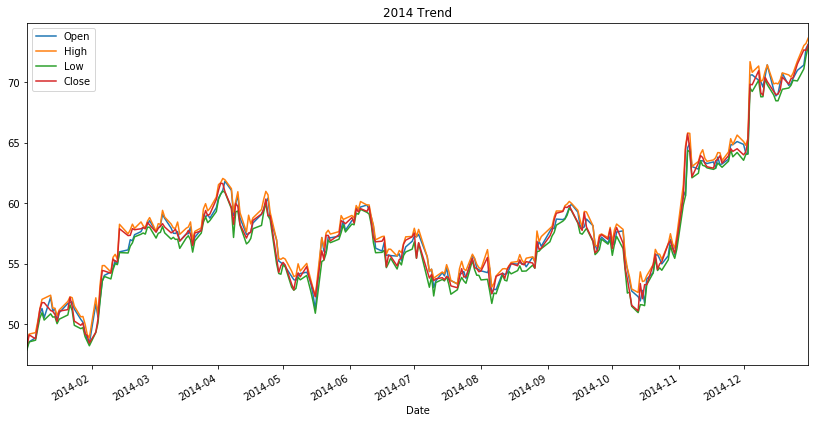

In [489]:
df14graph.plot(figsize = (14, 7))
plt.title('2014 Trend')
plt.show

The gap centres around 1 each side of the 0, until a large spike of nearly 4 in Novermber. 

<function matplotlib.pyplot.show>

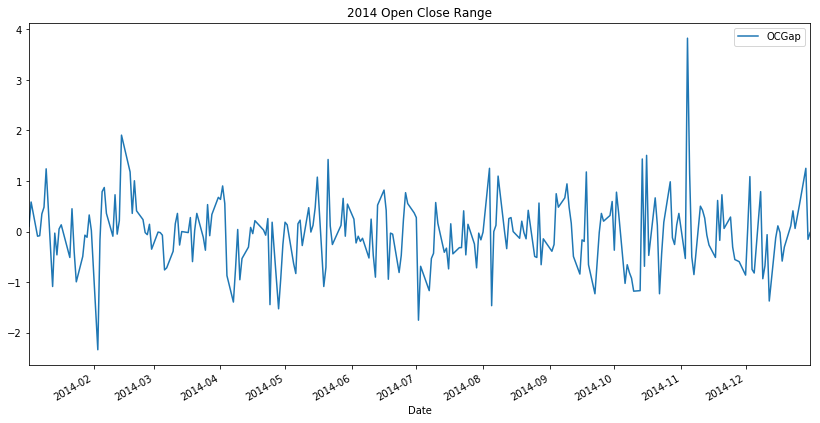

In [490]:
df2014['OCGap'] = df2014['Close'] - df2014['Open']
OCGap = df2014['OCGap']
OCGap.plot(figsize = (14, 7), legend=True)
plt.title('2014 Open Close Range')
plt.show

This same gap can be seen in the High to Low comparison. 

<function matplotlib.pyplot.show>

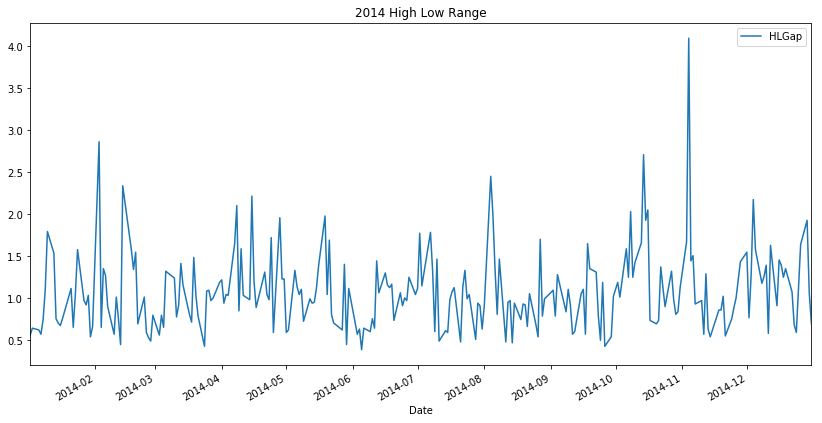

In [491]:
df2014['HLGap'] = df2014['High'] - df2014['Low']
HLGap = df2014['HLGap']
HLGap.plot(figsize = (14, 7), legend=True)
plt.title('2014 High Low Range')
plt.show

The percentage differnce for the most part is 0.02 to -0.02...

<function matplotlib.pyplot.show>

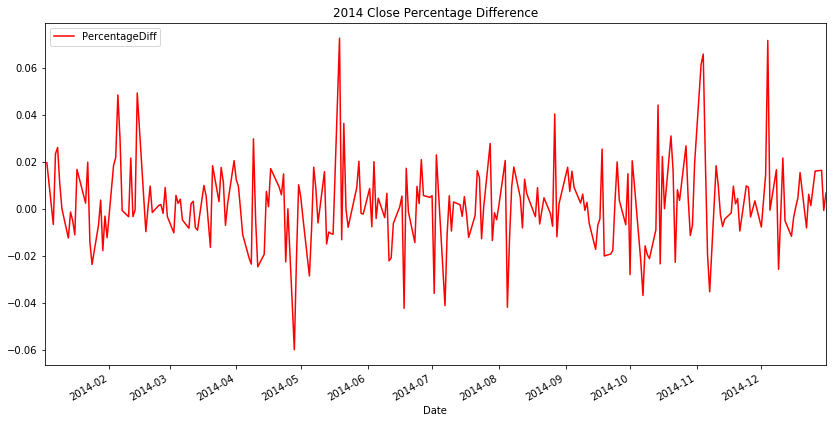

In [492]:
df2014['PercentageDiff'] = df2014['Close'].pct_change()
perc2014 = df2014['PercentageDiff']
perc2014.plot(figsize = (14, 7), legend = True, color = 'red')
plt.title('2014 Close Percentage Difference')
plt.show

## 2013

2013 was another good year for Ryanair. They made significant improvements, especially at the start of the year. 

In [493]:
df2013 = df[df['Year'] == 2013].copy()
df2013.head()

,Day,Month,Year,Open,High,Low,Close
Date,,,,,,,
2013-01-02,2,1,2013,35.897434,36.082050,35.292309,35.507690
2013-01-03,3,1,2013,35.897434,36.635899,35.784615,36.512821
2013-01-04,4,1,2013,36.512821,36.758976,36.348717,36.687180
2013-01-07,7,1,2013,37.589745,37.784615,37.353848,37.774361
2013-01-08,8,1,2013,38.266666,38.758976,38.194870,38.492310


In [494]:
df13graph = df2013.drop(df2013.columns[[0, 1, 2]], axis=1)
df13graph.head()

,Open,High,Low,Close
Date,,,,
2013-01-02,35.897434,36.082050,35.292309,35.507690
2013-01-03,35.897434,36.635899,35.784615,36.512821
2013-01-04,36.512821,36.758976,36.348717,36.687180
2013-01-07,37.589745,37.784615,37.353848,37.774361
2013-01-08,38.266666,38.758976,38.194870,38.492310


From January to August there is a rise of around 20, which is huge considering the stock started at just over 35 for that year. The last few months of the year aren't as kind but a significant rise can still be appreciated. 

<function matplotlib.pyplot.show>

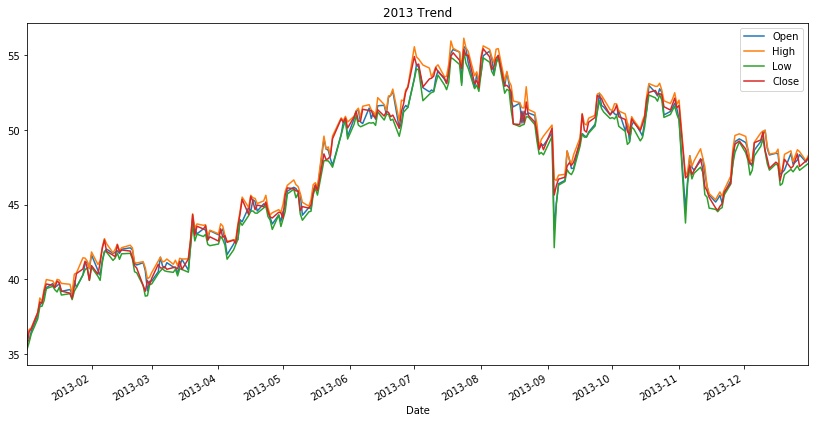

In [495]:
df13graph.plot(legend=True, figsize = (14, 7))
plt.title('2013 Trend')
plt.show

The Open to Close range is largely around the 1 difference mark. It never goes too high for this year. 

<function matplotlib.pyplot.show>

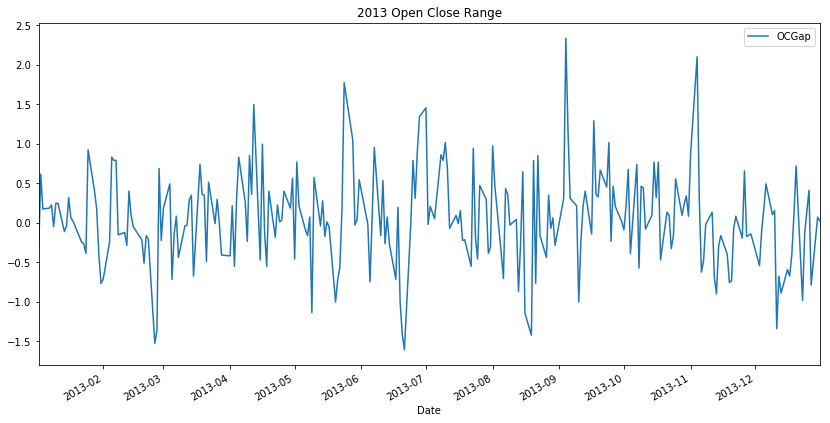

In [496]:
df2013['OCGap'] = df2013['Close'] - df2013['Open']
OCGap = df2013['OCGap']
OCGap.plot(figsize = (14, 7), legend=True)
plt.title('2013 Open Close Range')
plt.show

This is contrast to the High to Low comparison, which sees a difference of more than 4 for one particular day in September. This is way larger than any other day. 

<function matplotlib.pyplot.show>

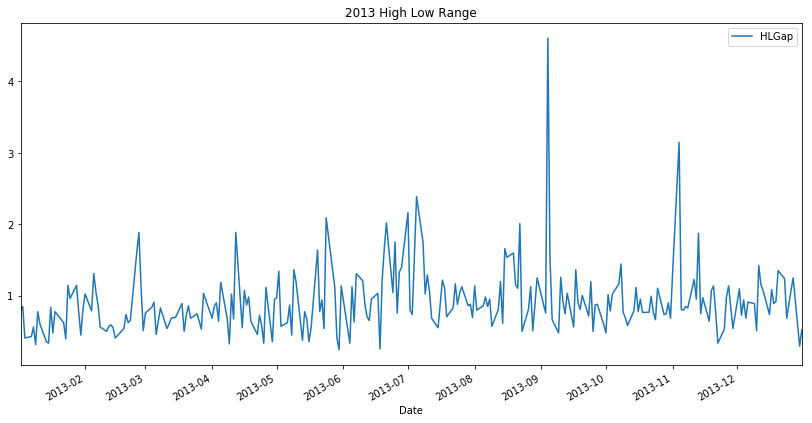

In [497]:
df2013['HLGap'] = df2013['High'] - df2013['Low']
HLGap = df2013['HLGap']
HLGap.plot(figsize = (14, 7), legend=True)
plt.title('2013 High Low Range')
plt.show

There are two interesting drops in September and November, both nearing 1 per cent. 

<function matplotlib.pyplot.show>

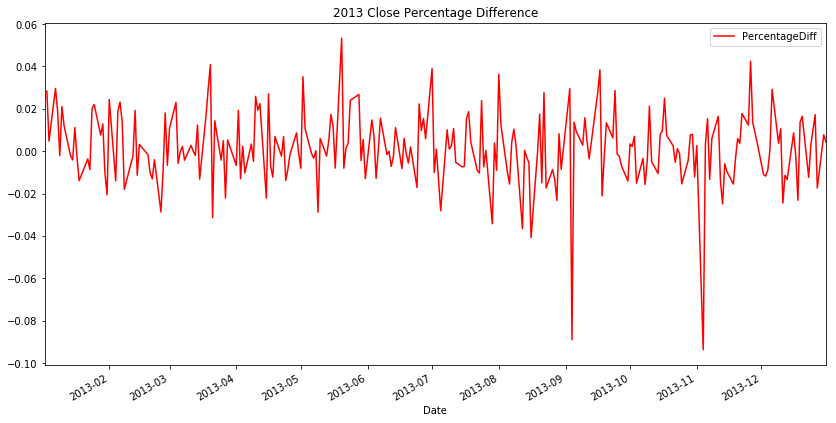

In [498]:
df2013['PercentageDiff'] = df2013['Close'].pct_change()
perc2013 = df2013['PercentageDiff']
perc2013.plot(figsize = (14, 7), color = 'red', legend = True)
plt.title('2013 Close Percentage Difference')
plt.show

## Descriptions

Looking at the descriptions give us a figure driven view and allows us to compare the different years. For these descriptions we will focus on the Opening Price. 

We look at it overall to begin. 
The average is 71.8 per day. 
The min is 35.9. 
The max is 125.5
The most surprising thing there is the range of min to max is nearly 90, which is massive when you recall that it is only 5 years of data. 

In [499]:
dfstock.describe()

,Open,High,Low,Close
count,1259.000000,1259.000000,1259.000000,1259.000000
mean,71.775439,72.409397,71.142101,71.781942
std,20.183919,20.327456,20.065047,20.218855
min,35.897434,36.082050,35.292309,35.507690
25%,54.682053,55.199999,54.158974,54.728206
50%,70.758972,71.470001,70.120003,70.589996
75%,82.744487,83.515000,82.119999,82.970001
max,125.500000,127.349998,121.650002,126.690002


2017: The average is 101.6. The min is 79.1. The max is 125.5. This year has seen the highest ever price, as seen from the overall description. It has also seen a range of over 45.  

In [500]:
df17graph.describe()

,Open,High,Low,Close
count,251.000000,251.000000,251.000000,251.000000
mean,101.565140,102.362988,100.801275,101.638247
std,13.344547,13.483791,13.206202,13.382092
min,79.129997,79.930000,78.349998,78.660004
25%,85.279999,85.795002,84.515000,85.199997
50%,105.900002,106.959999,105.120003,106.370003
75%,112.119999,113.200001,111.924999,112.455002
max,125.500000,127.349998,121.650002,126.690002


2016: The average is 78.6. The min is 67.7. The max is 89.5. The average is considerable lower than that of 2017. However the range from min to max is just over 20.  

In [501]:
df16graph.describe()

,Open,High,Low,Close
count,252.000000,252.000000,252.000000,252.000000
mean,78.588016,79.355556,77.895675,78.664920
std,5.382573,5.462626,5.382291,5.499446
min,67.730003,68.059998,66.089996,66.820000
25%,73.647501,74.672497,73.222501,74.187502
50%,80.375000,81.079998,79.614998,80.154999
75%,82.802502,83.580002,82.190002,83.184999
max,89.489998,89.669998,86.610001,87.410004


2015: The average is 74.0. The min is 63.5. The max is 87.9. This year's figures are quite similar to 2016, however as we seen from above the graphs look entirely different.  

In [502]:
df15graph.describe()

,Open,High,Low,Close
count,252.000000,252.000000,252.000000,252.000000
mean,74.015799,74.632125,73.306097,73.882367
std,6.471405,6.516953,6.498895,6.546256
min,63.507690,63.907692,62.533333,63.035896
25%,68.335900,68.825640,67.494871,67.833332
50%,74.041027,74.794872,73.415382,74.046154
75%,79.709231,80.385195,79.280772,79.792305
max,87.860001,88.239998,86.940002,87.639999


2014: The average is 57.6. The min is 48.1. The max is 73.1. Again, the average is decreasing the further the years go back. The range is also just above 20. 

In [503]:
df14graph.describe()

,Open,High,Low,Close
count,252.000000,252.000000,252.000000,252.000000
mean,57.581481,58.097029,57.019292,57.548759
std,5.031069,5.076955,5.034610,5.052477
min,48.092308,48.471794,47.907692,48.194870
25%,54.366667,54.848717,53.892306,54.394871
50%,56.892308,57.471796,56.256409,56.994873
75%,59.079488,59.497436,58.597437,59.192306
max,73.117950,73.630768,72.933334,73.097435


2013: The average is 47.2. The min is 35.9. The max is 55.6. Again, the average has fallen in comparison to 2014. This shows how much growth has occurred. When we compare 2013, the figures are staggering. In 2017, the average was 101.6, the min was 79.1 and the max was 125.5. That's a difference of over 50, 40 and 70 respectively. These are huge differences

In [504]:
df13graph.describe()

,Open,High,Low,Close
count,252.000000,252.000000,252.000000,252.000000
mean,47.244974,47.718152,46.805861,47.293895
std,4.776821,4.840010,4.749796,4.802941
min,35.897434,36.082050,35.292309,35.507690
25%,43.284617,43.651281,42.666668,43.382053
50%,48.056411,48.379488,47.420513,47.820513
75%,51.210257,51.694871,50.666668,51.202563
max,55.579487,56.143589,55.261539,55.435898


## Summer 2016

As outlined previously, the Summer of 2016 saw a massive fall in price for Ryanair. The reason for this will be outlines later. Now, we will just look at the graphs and figures. 

We isolate May, June and July of 2016 and put them in their own dataframe. 

In [505]:
may16 = df[(df.Year == 2016) & (df.Month == 5 )]
jun16 = df[(df.Year == 2016) & (df.Month == 6 )]
jul16 = df[(df.Year == 2016) & (df.Month == 7 )]

In [506]:
summ16 = [may16, jun16, jul16]

In [507]:
summer16 = pd.concat(summ16)

In [508]:
summer16.head()

,Day,Month,Year,Open,High,Low,Close
Date,,,,,,,
2016-05-02,2,5,2016,81.309998,82.610001,81.169998,82.110001
2016-05-03,3,5,2016,79.980003,81.070000,79.680000,80.059998
2016-05-04,4,5,2016,80.629997,80.900002,79.690002,80.110001
2016-05-05,5,5,2016,80.120003,80.400002,79.449997,79.480003
2016-05-06,6,5,2016,79.250000,79.879997,78.470001,79.440002


In [509]:
summer16 = summer16.drop(summer16.columns[[0, 1, 2]], axis=1)

This graph highlights the significant of the drop. The graph starts at over 80, rises to just below 90 and then falls sharply to under 70. All this in a period of 3 months. It shows how fragile stock can be. 

<function matplotlib.pyplot.show>

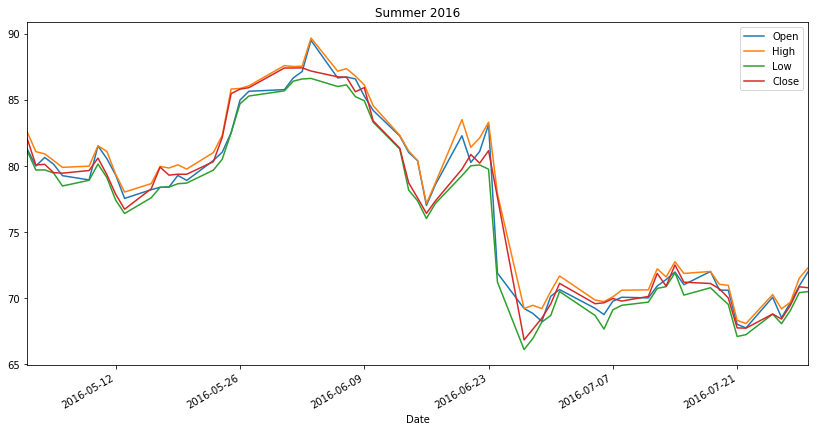

In [510]:
summer16.plot(figsize = (14, 7))
plt.title('Summer 2016')
plt.show

## Overall Percentage Analysis

The Pecentage Analysis sparked a particular interest in me earlier on in the notebook. Therefore, I wanted to get a view of it in an overall sense. For the most part the difference is under 0.05 either way. But there are some outliers than change how the graphs look. 

<function matplotlib.pyplot.show>

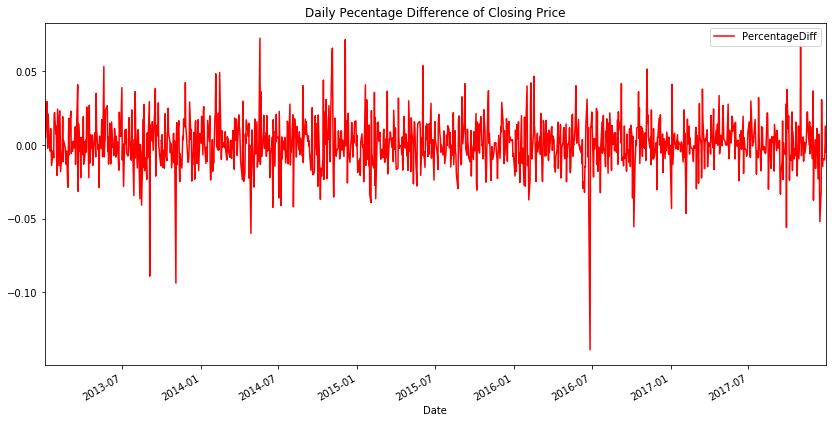

In [511]:
dfstock['PercentageDiff'] = dfstock['Close'].pct_change()
percFull = dfstock['PercentageDiff']
percFull.plot(figsize = (14, 7), legend = True, color = 'red')
plt.title('Daily Pecentage Difference of Closing Price')
plt.show

Therefore, the best way to portray this is with a histogram. It shows for the most part the stock is steady, and there are very few sudden spikes or falls. The graph does show the outliers below, but they are highlighted as being completely abnormal in relation to the rest of the data. Still, in stock market analysis, this data has to be acknowledged.

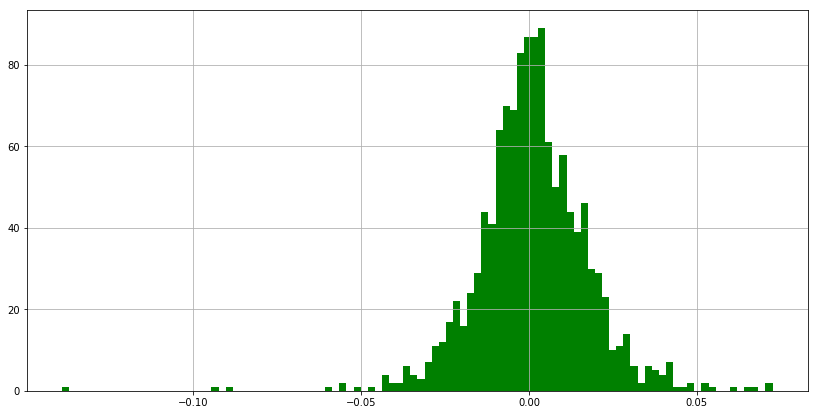

In [512]:
percFull.hist(bins=100, color = 'green', figsize = (14, 7))

## 2017 Flight Cancellations

In the Autumn of 2017, Ryanair had a major crisis in relation to flight cancellations. This was due to mistakes by Ryanair officials in relation to Annual Leave for Pilots. They needed to cancel flights as they were unable to get enough cover for the staff on holidays. As well as this, their punctuality had fallen to below 70%. We will look at how this period affected their stock price. 

In [513]:
cancelFli = dfstock.loc['2017-09-12':'2017-09-27']

In [514]:
cancelFli = cancelFli.drop(cancelFli.columns[[4]], axis=1)

In [515]:
cancelFli.head()

,Open,High,Low,Close
Date,,,,
2017-09-12,115.889999,116.820000,115.449997,116.669998
2017-09-13,115.480003,115.580002,113.849998,114.089996
2017-09-14,110.209999,110.949997,109.129997,110.279999
2017-09-15,109.000000,109.550003,108.029999,108.150002
2017-09-18,107.230003,107.919998,106.639999,107.000000


As you can see the stock price suffered massively, and fell from around 116 to 106. Many people would've sold their stock as they thought the airline was begining to lose control of the pure demand of customers. This occurred in a period of just over 2 weeks. In this time Ryanair would've been in the news quite a lot, and often in negative terms. A lot of people would've been extremely frustrated that their flight was cancelled and there was a lot of uncertainty surrounding later flights. This all contributed to this massive fall. 

<function matplotlib.pyplot.show>

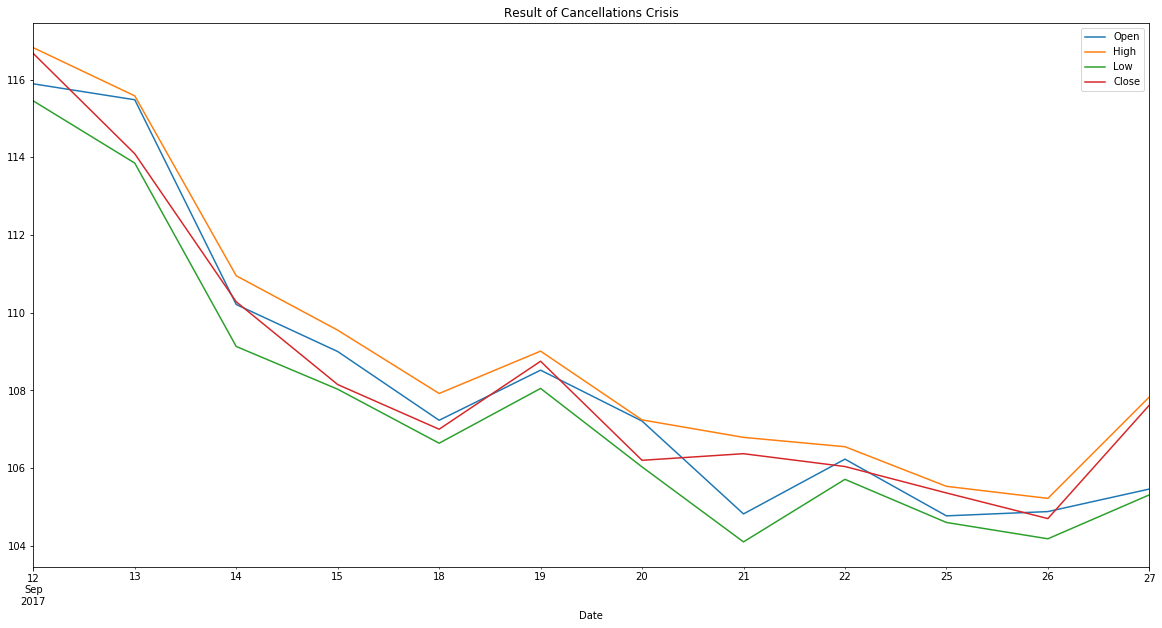

In [516]:
cancelFli.plot(figsize = (20, 10))
plt.title('Result of Cancellations Crisis')
plt.show

## Brexit

Perhaps the most significant fall over the last 5 years occurred in the Summer of 2016. Time and time again in this analysis we have noticed this massive drop at around June of that year. We looked at the graph in detail in the Summer section above. What we haven't looked at is the reason for this drop. So why did it happen?? The reason... BREXIT.

In a referendum on the 23rd June 2016, Britain voted to leave the European Union. This had a direct effect on the stock of many comapnies including Ryanair. Ryanair only fly to countries in the EU, as that is all their current licence allows. Therefore, once BREXIT comes into play they will be unable to fly to the UK unless a deal is agreed. Therefore, many people sought the opportunity to sell their stock in anticipation of Ryanair losing a massive amount of their business. The extent of this can be seen below. 

We'll look at the period from 2 days before the referendum to the 29th of June. 

In [517]:
brexit = dfstock.loc['2016-06-21':'2016-06-29']

In [518]:
brexit = brexit.drop(brexit.columns[[4]], axis=1)

In [519]:
brexit.head()

,Open,High,Low,Close
Date,,,,
2016-06-21,80.250000,81.400002,80.000000,80.849998
2016-06-22,81.089996,82.110001,80.059998,80.199997
2016-06-23,83.129997,83.300003,79.739998,81.139999
2016-06-24,71.879997,77.879997,71.199997,77.610001
2016-06-27,69.199997,69.199997,66.089996,66.820000


This graph is quite astonishing. The 21st and 22nd have a steady price and then comes the 23rd (Referendum day). From the 23rd to the 24th the opening price falls from 82.5 to 72.5. Thats 10 in one single day. It then drops even further to below 70 on the 27th. Brexit was truly astronomical. The drop then mellowed after this, but the damage had already been done. Those who were going to sell got rid of their shares quickly. It was a common trend that occurred in companies around this time, all because of Brexit. 

<function matplotlib.pyplot.show>

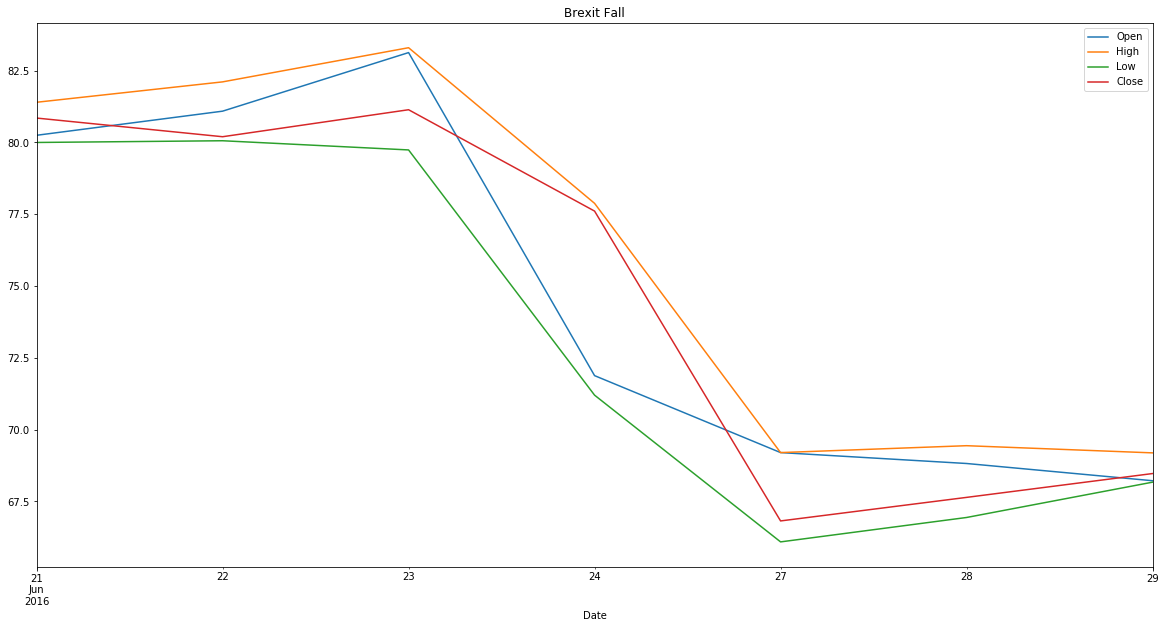

In [520]:
brexit.plot(figsize = (20, 10))
plt.title('Brexit Fall')
plt.show

## Growth

On the flip side I wanted to look at what causes stock prices to rise. January and February 2014 were busy months for Ryanair. They moved into brand new offices in Dublin, showing they were suceeding and growing at this time. They also announced that it would create over 50 new IT and digital jobs as the company looked to make improvements to Ryanair.com. They also introduced 4 new routes from Cork and 4 new routes from Dublin as traffic demand grew and grew. All this contributed to Ryanair being in the news on numerous occasions during these months so more people were investing in the company. 

We'll look at the period from January 30th to Valentine's Day of 2014.

In [521]:
gro = dfstock.loc['2014-01-30':'2014-02-14']

In [522]:
gro = gro.drop(gro.columns[[4]], axis=1)

In [523]:
gro.head()

,Open,High,Low,Close
Date,,,,
2014-01-30,48.738461,49.169231,48.625641,49.066666
2014-01-31,48.441025,48.902565,48.235897,48.461540
2014-02-03,51.692307,52.194870,49.333332,49.353848
2014-02-04,50.594872,50.769230,50.112820,50.430771
2014-02-05,52.082050,53.323078,51.969231,52.871796


As you can see there is a significant rise at this time. The influence of media is very apparent, and in this case good news seems to contribute to the rise. Everyone loves to invest in a visibly growing and thriving company. 

<function matplotlib.pyplot.show>

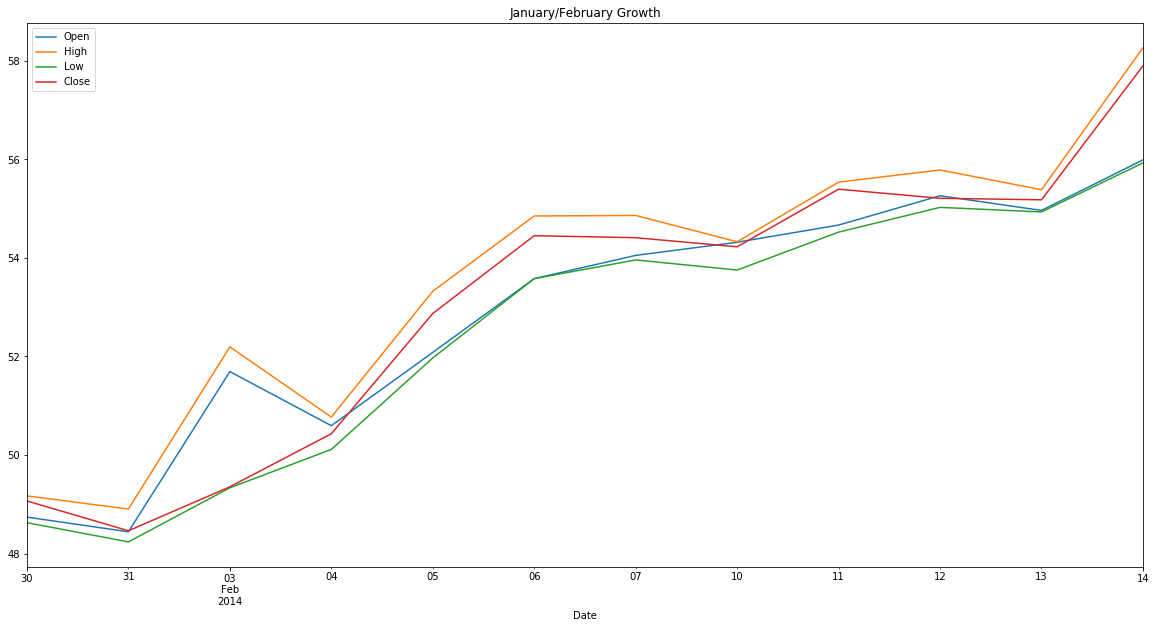

In [524]:
gro.plot(figsize = (20, 10))
plt.title('January/February Growth')
plt.show

I predict Ryanair will continue to grow and grow. It will soon be Ireland's biggest company and I suspect it has aspirations to break into the transatlantic market. This will only cause the stock price to keep rising and I imagine more investers will come from overseas. Brexit is a major landmark for them however, and how they come out of the will be pivotal to their success in the future. If I was to make a prediction based on my research, I would expect the price of Ryanair to be around 120 by the end of this year, and nearly 200 in 5 years time. To conclude, I have thoroughly enjoyed my first stock market analysis, and viewing the trends of an individual company has proven to be extremely interesting. 